## Group3 Demo3 

flower classification 5 classes \
https://www.kaggle.com/datasets/utkarshsaxenadn/flower-classification-5-classes-roselilyetc

In [1]:
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [2]:
train_dir = Path('./Flower Classification/Training Data')
test_dir = Path('./Flower Classification/Testing Data')
validation_dir = Path('./Flower Classification/Validation Data')

In [3]:
batch_size = 32
img_height = 256
img_width = 256
input_shape = (img_height, img_width, 3)

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(img_height, img_width), batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(img_height, img_width), batch_size=batch_size)
validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir, image_size=(img_height, img_width), batch_size=batch_size)

Found 5000 files belonging to 5 classes.
Found 958 files belonging to 5 classes.
Found 2500 files belonging to 5 classes.


In [5]:
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
class_names

['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']

In [13]:
file_types = ['JPEG', 'PNG', 'GIF', 'BMP']

In [15]:
for dir in os.listdir(test_dir):
    for file in os.listdir(test_dir.joinpath(dir)):
        if not file.endswith(tuple([fp.lower() for fp in file_types])):
           print(file) 

Daisy (1).jpeg
Daisy (10).jpeg
Daisy (100).jpeg
Daisy (101).jpeg
Daisy (102).jpeg
Daisy (103).jpeg
Daisy (104).jpeg
Daisy (105).jpeg
Daisy (106).jpeg
Daisy (107).jpeg
Daisy (108).jpeg
Daisy (109).jpeg
Daisy (11).jpeg
Daisy (110).jpeg
Daisy (111).jpeg
Daisy (112).jpeg
Daisy (113).jpeg
Daisy (114).jpeg
Daisy (115).jpeg
Daisy (116).jpeg
Daisy (117).jpeg
Daisy (118).jpeg
Daisy (119).jpeg
Daisy (12).jpeg
Daisy (120).jpeg
Daisy (121).jpeg
Daisy (122).jpeg
Daisy (123).jpeg
Daisy (124).jpeg
Daisy (125).jpeg
Daisy (126).jpeg
Daisy (127).jpeg
Daisy (128).jpeg
Daisy (129).jpeg
Daisy (13).jpeg
Daisy (130).jpeg
Daisy (131).jpeg
Daisy (132).jpeg
Daisy (133).jpeg
Daisy (134).jpeg
Daisy (135).jpeg
Daisy (136).jpeg
Daisy (137).jpeg
Daisy (138).jpeg
Daisy (139).jpeg
Daisy (14).jpeg
Daisy (140).jpeg
Daisy (141).jpeg
Daisy (142).jpeg
Daisy (143).jpeg
Daisy (144).jpeg
Daisy (145).jpeg
Daisy (146).jpeg
Daisy (147).jpeg
Daisy (148).jpeg
Daisy (149).jpeg
Daisy (15).jpeg
Daisy (150).jpeg
Daisy (151).jpeg
Daisy

In [11]:
def show_images(data, class_names, model=None):
    n_images = 12
    plt.figure(figsize=(14, 14))
    
    i = 1
    for images, labels in iter(data):
        print(labels)
        # Select data Randomly
        id = np.random.randint(len(images))
        image, label = images[id], class_names[int(labels[id])]
        
        # Show Image
        plt.subplot(5, 6, i)
        plt.imshow(np.array(image,np.int32))
        
        # make Predictionq
        if model is None:
            title = label
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"True : {label}\nPred : {pred}"
        
        plt.title(title)
        plt.axis('off')
        i+=1
        if i>=(n_images+1):
            break
    plt.show()

tf.Tensor([1 4 4 3 0 2 2 3 4 1 2 2 0 2 3 2 3 4 1 4 0 0 0 2 0 3 2 0 1 0 2 3], shape=(32,), dtype=int32)
tf.Tensor([0 2 1 4 0 2 3 2 2 1 0 4 1 4 3 4 1 2 3 4 4 4 3 3 4 1 1 3 3 4 4 1], shape=(32,), dtype=int32)
tf.Tensor([4 3 4 3 0 3 1 2 4 0 4 0 0 4 1 3 3 3 3 1 3 1 0 4 3 3 4 3 1 3 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 2 1 2 4 1 3 4 4 1 1 1 1 2 4 0 0 4 4 1 1 1 0 1 3 1 1 2 3 1 4 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 2 3 0 4 4 0 2 1 4 4 2 1 3 4 3 2 2 0 1 0 3 2 0 2 4 3 0 1 4 3], shape=(32,), dtype=int32)
tf.Tensor([2 4 4 0 3 0 2 3 4 3 4 0 2 4 4 4 1 2 0 2 2 1 3 2 2 0 3 0 3 3 4 1], shape=(32,), dtype=int32)
tf.Tensor([2 2 1 0 1 0 3 0 3 2 1 4 1 4 1 3 0 1 0 4 1 4 3 3 4 4 0 4 1 0 2 4], shape=(32,), dtype=int32)
tf.Tensor([3 2 0 3 2 2 4 1 3 1 4 1 3 1 2 0 0 0 2 3 1 0 1 4 1 0 4 0 0 4 3 3], shape=(32,), dtype=int32)
tf.Tensor([0 1 4 3 3 1 0 4 2 1 0 3 1 4 0 1 4 4 2 2 4 2 3 1 4 0 2 3 2 3 2 2], shape=(32,), dtype=int32)
tf.Tensor([3 2 2 2 1 4 0 1 1 4 1 3 0 4 2 3 0 3 2 4 2 3 2 0 4 0 4 2 1 2 2 

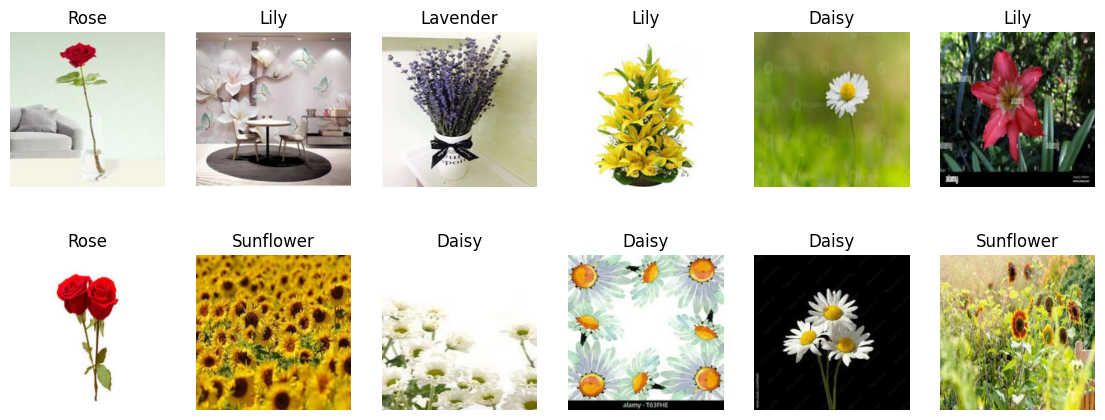

tf.Tensor([0 2 2 4 3 2 0 4 4 0 0 1 0 3 0 1 3 1 3 4 4 2 3 3 3 4 0 2 0 1 2 3], shape=(32,), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]

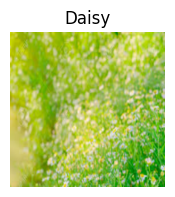

In [12]:
show_images(data=train_ds, class_names=class_names)
show_images(data=test_ds, class_names=class_names)
show_images(data=validation_ds, class_names=class_names)

Basic keras model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

In [ ]:
model = Sequential([
  keras.layers.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(train_ds, validation_data=validation_ds, batch_size=batch_size, epochs=epochs, callbacks=[early_stop])

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(val_loss))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

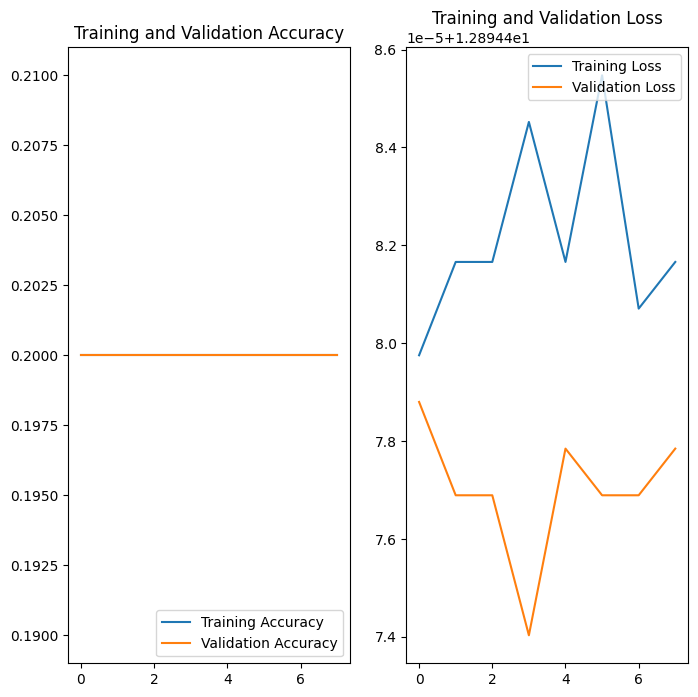

In [ ]:
plot_history(history)

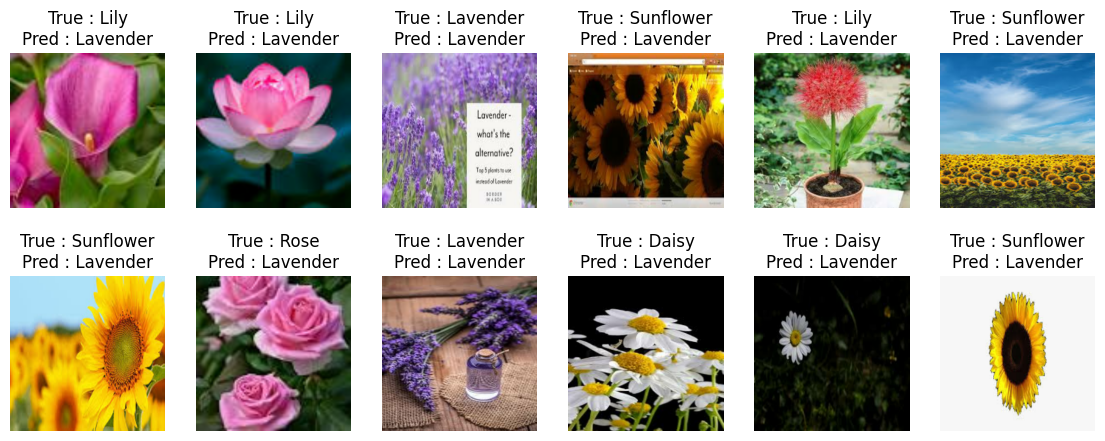

In [ ]:
show_images(data=validation_ds, class_names=class_names, model=model)

Little bit improved basic model

In [ ]:
model2 = Sequential([
    keras.layers.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(1024,activation=('relu'),input_dim=512),
    layers.Dense(512,activation=('relu')),
    layers.Dropout(.4),
    layers.Dense(256,activation=('relu')),
    layers.Dropout(.3),
    layers.Dense(128,activation=('relu')),
    layers.Dropout(.2),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_ds, epochs=10, validation_data=validation_ds, batch_size=batch_size, callbacks=[early_stop])

Epoch 1/10
157/157 [==============================] - 387s 2s/step - loss: 1.8202 - accuracy: 0.2080 - val_loss: 1.6094 - val_accuracy: 0.2120
Epoch 2/10
157/157 [==============================] - 386s 2s/step - loss: 1.6346 - accuracy: 0.2150 - val_loss: 1.6094 - val_accuracy: 0.2036
Epoch 3/10
157/157 [==============================] - 416s 3s/step - loss: 1.6375 - accuracy: 0.2158 - val_loss: 1.6094 - val_accuracy: 0.2120
Epoch 4/10
157/157 [==============================] - 426s 3s/step - loss: 1.6517 - accuracy: 0.2048 - val_loss: 1.6094 - val_accuracy: 0.2204
Epoch 5/10
157/157 [==============================] - 405s 3s/step - loss: 1.6491 - accuracy: 0.2116 - val_loss: 1.6094 - val_accuracy: 0.2232
Epoch 00005: early stopping


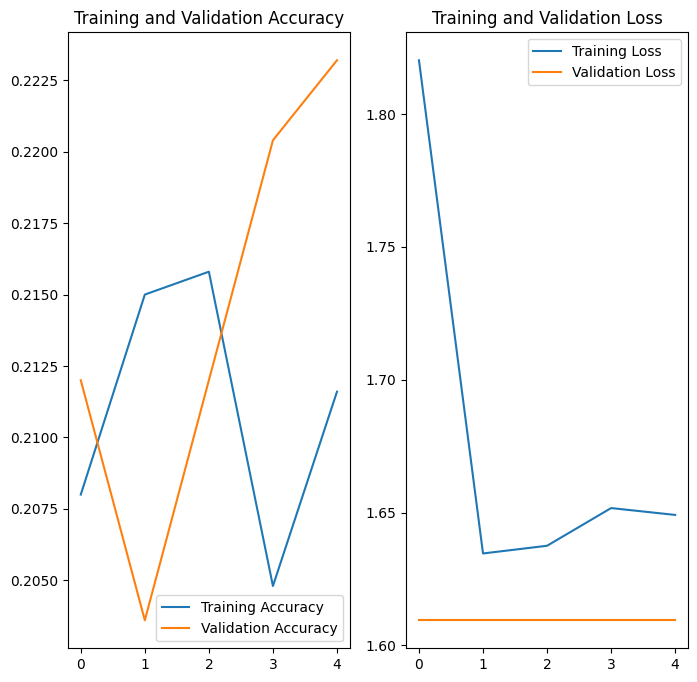

In [ ]:
plot_history(history2)

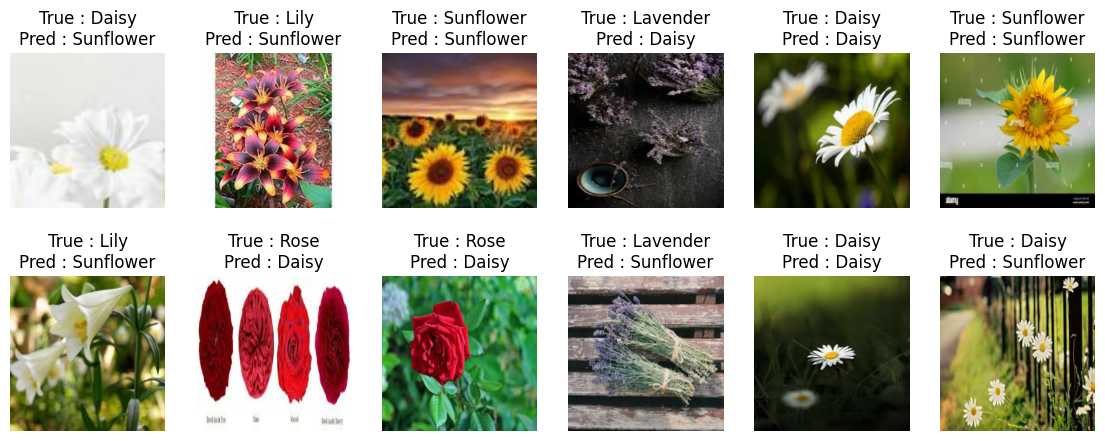

In [ ]:
show_images(data=validation_ds, class_names=class_names, model=model2)

Transfer learning

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False)
pretrained_model.trainable = False

transfered_model = Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
transfered_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 15
history_transfered_model = transfered_model.fit(train_ds, validation_data=validation_ds, batch_size=32, epochs=epochs, callbacks=[early_stop])

Epoch 1/15
157/157 [==============================] - 202s 1s/step - loss: 3.4909 - accuracy: 0.5942 - val_loss: 3.5961 - val_accuracy: 0.5820
Epoch 2/15
157/157 [==============================] - 170s 1s/step - loss: 1.1593 - accuracy: 0.8122 - val_loss: 4.1245 - val_accuracy: 0.6012
Epoch 3/15
157/157 [==============================] - 177s 1s/step - loss: 0.7910 - accuracy: 0.8616 - val_loss: 5.6355 - val_accuracy: 0.5872
Epoch 4/15
157/157 [==============================] - 180s 1s/step - loss: 0.8783 - accuracy: 0.8798 - val_loss: 3.8865 - val_accuracy: 0.6776
Epoch 5/15
157/157 [==============================] - 199s 1s/step - loss: 0.4813 - accuracy: 0.9220 - val_loss: 3.4476 - val_accuracy: 0.7084
Epoch 6/15
157/157 [==============================] - 179s 1s/step - loss: 0.2514 - accuracy: 0.9550 - val_loss: 3.7439 - val_accuracy: 0.7048
Epoch 7/15
157/157 [==============================] - 175s 1s/step - loss: 0.1403 - accuracy: 0.9708 - val_loss: 3.8503 - val_accuracy: 0.7016

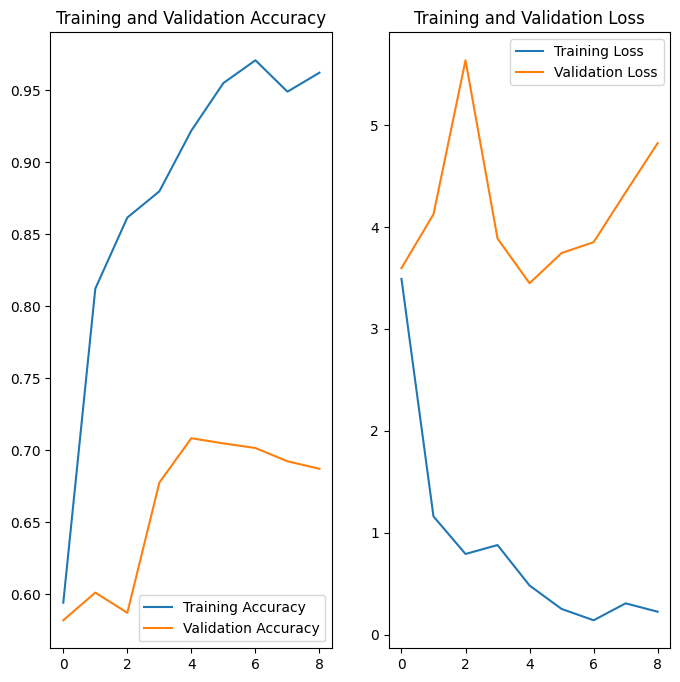

In [ ]:
plot_history(history_transfered_model)

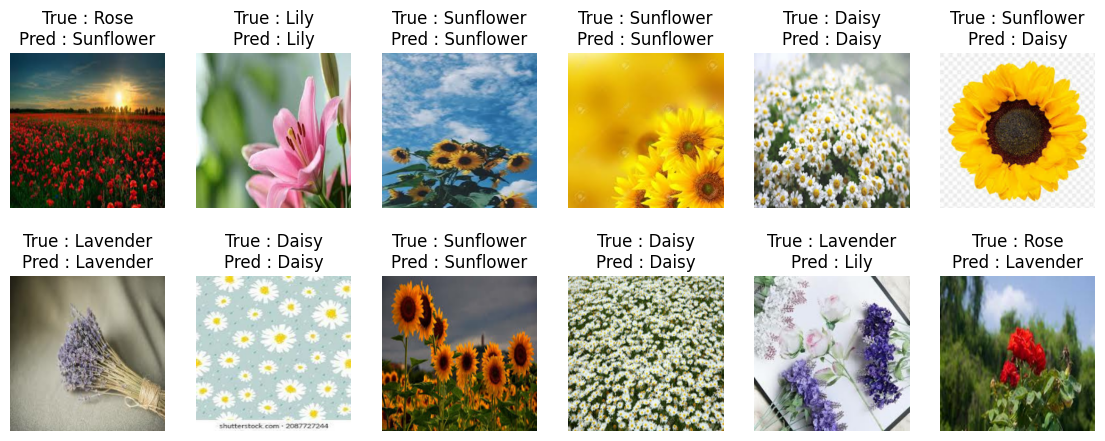

In [ ]:
show_images(data=validation_ds, class_names=class_names, model=transfered_model)